# Assignment 5 - Deep Learning

$\textbf{NAME : CHAITANYA DARADE}$

# Overview

Objective of this assignment is to understand Deep learning through implementing Neural network model using tensorflow or keras, on a classification dataset. The classification dataset used, is preprocessed, visualized and oberserved before giving it to the neural network model.

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adagrad
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, classification_report
import warnings
warnings.filterwarnings("ignore")

# II. Data

# Data: Description

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

* File information : 

winequality-red2.csv
winequality-white2.csv

(12994*14)

* Attribute Information:

For more information
Input variables (based on physicochemical tests):

1 : fixed acidity  
    Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and       succinic acids)
    
2 : volatile acidity
    These acids are to be distilled out from the wine before completing the production process.
    
3 : citric acid
    This is one of the fixed acids which gives a wine its freshness.
    
4 : residual sugar
    This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is     stopped.
    
5 : chlorides
    This is usually a major contributor to saltiness in wine.
    
6 : free sulfur dioxide
    This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part         binds
    
7 : total sulfur dioxide
    This is the sum total of the bound and the free sulfur dioxide
    This is mainly added to kill harmful bacteria and preserve quality and freshness. 
    
8 : density
    This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of         water.It is generally used as a measure of the conversion of sugar to alcohol. 
    
9 : pH
    Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine.
    
10: sulphates
    These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of     the winemaking around the world and are considered essential.
    
11: alcohol
    Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation       process. The percentage of alcohol can vary from wine to wine.
    
12: quality (score between 0 and 10)
    Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is     the median of at least three evaluations made by the same wine experts.
    
Additional two features are added :
    First is to determine type of wine and second is to determine wine quality.
    
13: wine_type
    Type of wine(red or white)
    
14: wine_quality(Classification feature)
    Quality of the wine(low or mediun or high)
    
Source : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Data - Plots for understanding and Preliminary observation

## Reading the Data

Both data files(winequality-red2.csv, winequality-white2.csv) are read with pandas dataframes and concatenated into
single one.

It's shape and info is being displayed after merging them in preprossessing section.

In [55]:
red_wine_data = pd.read_csv('winequality-red2.csv',sep=',')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
white_wine_data = pd.read_csv('winequality-white2.csv',sep=',')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Preprocessing of the Data

In preprocessing activity, Additional two features are added : First is to determine type of wine and second is to determine wine quality.
Then both datasets are concatenated into single dataframe

Quality is being classified in two classes i.e 'low' and 'high'

In [57]:
red_wine_data['wine_type'] = 'red'
red_wine_data['wine_quality'] = red_wine_data['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'high')
red_wine_data['wine_quality'] = pd.Categorical(red_wine_data['wine_quality'], 
                                           categories=['low','high'])
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [58]:
white_wine_data['wine_type'] = 'white'
white_wine_data['wine_quality'] = white_wine_data['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'high' )

white_wine_data['wine_quality'] = pd.Categorical(white_wine_data['wine_quality'], 
                                             categories=['low', 'high'])
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,high
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,high
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high


In [59]:
wine_data=pd.concat([red_wine_data,white_wine_data])
wine_data = wine_data.sample(frac=1, random_state=95).reset_index(drop=True)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,red,low
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,white,low
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,white,high
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,white,high
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,white,low


In [60]:
le = preprocessing.LabelEncoder()
wine_data['wine_quality'] = le.fit_transform(wine_data['wine_quality']) 
wine_data['wine_type'] = le.fit_transform(wine_data['wine_type']) 
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,0
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,0
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,1


In [61]:
wine_data.shape

(12994, 14)

In [62]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,0
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,0
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,1


In [63]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 14 columns):
fixed acidity           12994 non-null float64
volatile acidity        12994 non-null float64
citric acid             12994 non-null float64
residual sugar          12994 non-null float64
chlorides               12994 non-null float64
free sulfur dioxide     12994 non-null float64
total sulfur dioxide    12994 non-null float64
density                 12994 non-null float64
pH                      12994 non-null float64
sulphates               12994 non-null float64
alcohol                 12994 non-null float64
quality                 12994 non-null int64
wine_type               12994 non-null int64
wine_quality            12994 non-null int64
dtypes: float64(11), int64(3)
memory usage: 1.4 MB


## Visualization of the Data and Preliminary obervations

In [64]:
data_cols = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine_data[data_cols].describe(),2)
ws = round(white_wine_data[data_cols].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Stats', 'White Wine Stats'])

Red Wine Stats                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        3198.00              3198.00   3198.00  3198.00          3198.00   
mean            2.54                46.47      0.66    10.42             0.53   
std             1.41                32.89      0.17     1.07             0.18   
min             0.90                 6.00      0.33     8.40             0.12   
25%             1.90                22.00      0.55     9.50             0.39   
50%             2.20                38.00      0.62    10.20             0.52   
75%             2.60                62.00      0.73    11.10             0.64   
max            15.50               289.00      2.00    14.90             1.58   

               White Wine Stats                                          \
       quality   residual sugar total sulfur dioxide sulphates  alcohol   
count  3198.00          9796.00              9796.00   9796.00  9796.00   
mean      5.64             6.39               138.36      0.49    10.51   
std       0.81             5.07                42.50      0.11     1.23   
min       3.00             0.60                 9.00      0.22     8.00   
25%       5.00             1.70               108.00      0.41     9.50   
50%       6.00             5.20               134.00      0.47    10.40   
75%       6.00             9.90               167.00      0.55    11.40   
max       8.00            65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          9796.00  9796.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

In [65]:
wines_corr = wine_data.corr()
round(wines_corr,2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08,-0.49,0.07
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27,-0.65,0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09,0.19,-0.08
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04,0.35,0.03
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20,-0.51,0.18
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06,0.47,-0.04
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04,0.70,0.05
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31,-0.39,0.27
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02,-0.33,-0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04,-0.49,-0.04


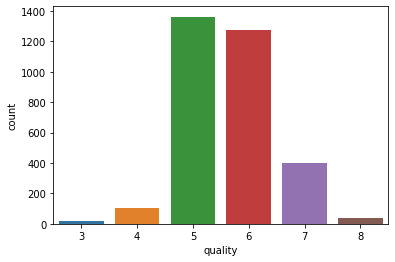

In [66]:
ax = sns.countplot(x=red_wine_data.quality, data=red_wine_data)

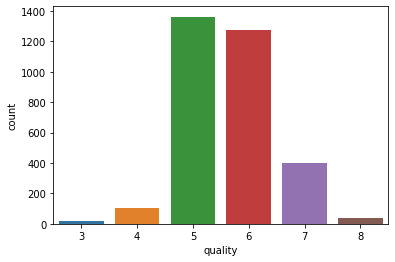

In [67]:
ax = sns.countplot(x=red_wine_data.quality, data=white_wine_data)

### Obeservation:

According to the data description, quality is a score between 0 to 10. But we can see that red and white wine doesn't have any values in the low and high extreme ends of the scale 0 to 10. In addition we can also see that the quality rating are kind of normally distributed with large ditribution in the center of the scale around 5 and 6 and flatenning out in the ends. The normal distibution of the quality is true because there is will be few top wines in the market and then followed by bunch of medium quality wines and then the lower ends.


Is the quality of wine depends on the alcohol level in the wine? This is a interesting problem to anwser. So lets dive in.

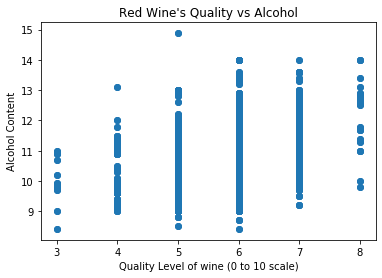

In [68]:
plt.scatter(x = red_wine_data.quality, y = red_wine_data.alcohol, marker='o')
plt.title("Red Wine's Quality vs Alcohol")
plt.xlabel("Quality Level of wine (0 to 10 scale)")
plt.ylabel("Alcohol Content")
plt.show()

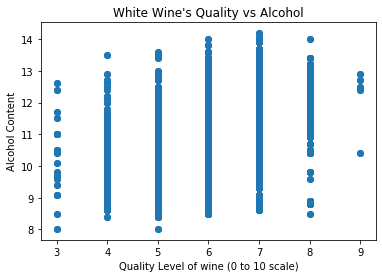

In [69]:
plt.scatter(x = white_wine_data.quality, y = white_wine_data.alcohol, marker='o')
plt.title("White Wine's Quality vs Alcohol")
plt.xlabel("Quality Level of wine (0 to 10 scale)")
plt.ylabel("Alcohol Content")
plt.show()

### Obeservation

When we look at the red and white wine's alcohol content we can see some increasing trend from the lower quality rating to the high quality rating. This shows that quality is depend on the alcohol content in the wine. But how much does the quality depends on the Alcohol content. In order to answer that question, we will try to address the all the rlation between the the variables in our dataset using correlation and heatmaps.

In [70]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()

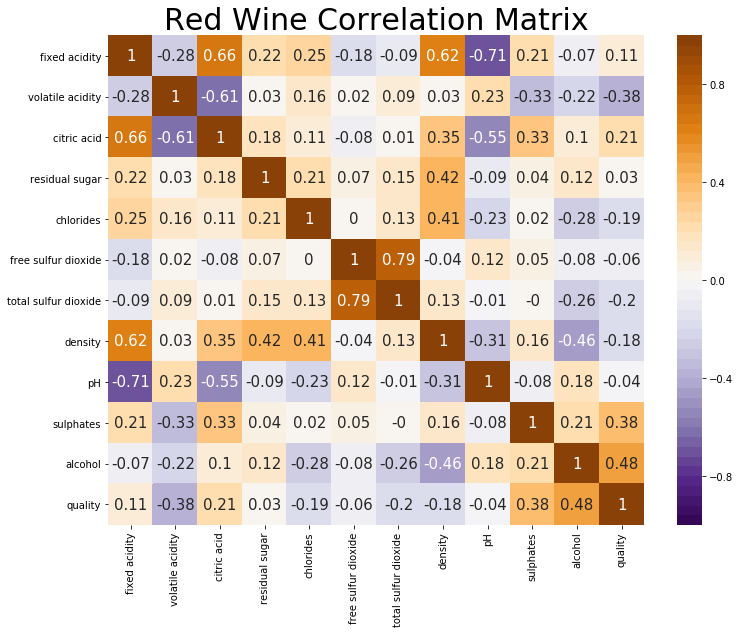

In [71]:
# Call the confusion matrix function
confusion_matrix_plot(red_wine_data, title = "Red Wine Correlation Matrix")

Heatmap shows the correlation between the variables in the dataset. High concentration of color representation high corrlation. Brown represents positive and purple represents negative correlation.

From the above heatmap on the red wine, we have the following inference

1 : It looks like we have pH and fixed acidity has inverse relationships between them. The same in case of citric acid and volatile acidity too.

2 : There is a strong positive relationship between total sulfur dioxide and free sulfur dioxide.

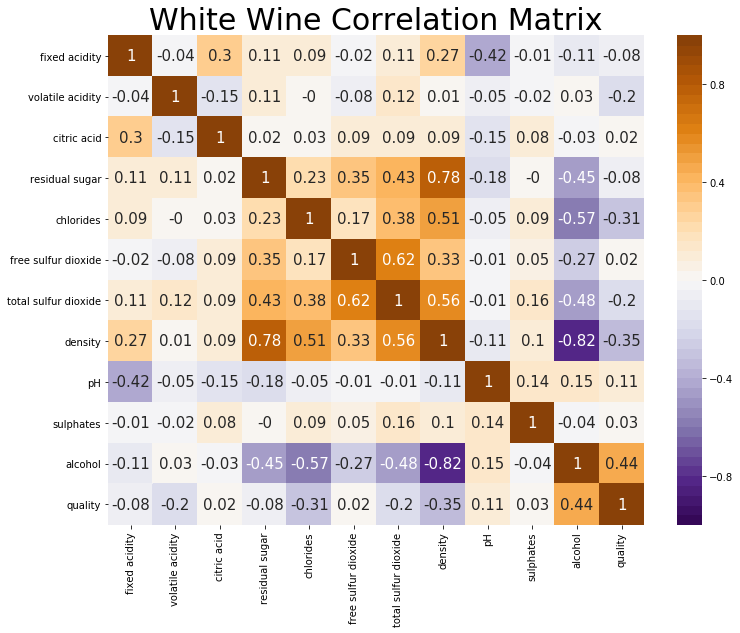

In [72]:
confusion_matrix_plot(white_wine_data, title = "White Wine Correlation Matrix")

From the above white wine heatmap, we have the following inferences:
1 : We see that low density contents are high on alcohol content

2 : Sugar content in the wine might represents the wine density

3 : Just like red wine, here also total and free sulfur dioxide are related together

Now that we have seen much about the predictors lets see the responding varaible quality and how it is related to the predictors. We see the quality is more depend on the folowwing from both red and white wines

### Positive relation (Increase in this will increase the quality)

* ${Alcohol}$:

* ${Sulphates}$:

### Positive relation (Increase in this will decrease the quality)

* ${Density}$:

* ${Volatile acidity}$:

* ${Chlorides}$:

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)

### Split the data

In [73]:
X_Dataframe = wine_data.drop(['wine_quality'],axis=1)
y_Dataframe = wine_data['wine_quality']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_Dataframe, y_Dataframe, test_size=0.2, random_state=10)

In [75]:
X_train.shape

(10395, 13)

In [76]:
X_test.shape

(2599, 13)

In [77]:
y_train.shape

(10395,)

In [78]:
y_test.shape

(2599,)

## Model 1 :

### Attributes:

1. Layers - 5
2. Activation function for Input and Hidden Layer : tanh
3. Activation function for Output Layer : sigmoid
4. Batch_size = 32 (Default)
5. loss function : binary_crossentropy
6. optimizer='sgd'
7. metrics='accuracy'

### Explanation of CODE

This sequential model of Karas is built with activation function 'tanh' for input layer and hidden layers and output layer with 'sigmoid' function. Initial model is built only with 5 layers in total, with neurons [13,14,15,16,1] respectively,and compiled with 'binary_crossentropy' loss and 'sgd' optimizer. Then model is fitted on training data which is splitted to 80% of total data, keeping batch size to default value i.e 32 and epochs 10. The model is validated against the test data which is 20%. Calculated accuracy of training and testing(validation) data and confusion matrix is calculated.

#### Different parameters used:

##### Activation Functions:

1. tanh : It's a zero centered function which makes it easier to model inputs that have strongly negative, neutral, and strongly positive values.


2. Sigmoid : It's a smooth gradient function which prevents jumps in output values. Output values bound between 0 and 1, normalizing the output of each neuron.

###### Loss 

1. binary_crossentropy: It's a Binary Classification Loss Function,intended for use with binary classification where the target values are in the set {0, 1}.

##### Optimizer

1. SGD: It's most basic form of optimization algorithm, performs a parameter update for each training example unlike batch gradient descent.It's usually much faster and can also be used to learn online.

### Training

In [79]:
model1 = Sequential()
model1.add(Dense(13, input_dim=13, activation='tanh'))
model1.add(Dense(14, activation='tanh'))
model1.add(Dense(15, activation='tanh'))
model1.add(Dense(16, activation='tanh'))
model1.add(Dense(1, activation='sigmoid'))

In [80]:
#simple_sgd = SGD(lr=0.01)
model1.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [81]:
model1_output=model1.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Train on 10395 samples, validate on 2599 samples
Epoch 1/10
10395/10395 [==============================] - 2s 224us/step - loss: 0.6588 - acc: 0.6192 - val_loss: 0.6453 - val_acc: 0.6372
Epoch 2/10
10395/10395 [==============================] - 1s 98us/step - loss: 0.6534 - acc: 0.6281 - val_loss: 0.6411 - val_acc: 0.6541
Epoch 3/10
10395/10395 [==============================] - 1s 98us/step - loss: 0.6516 - acc: 0.6339 - val_loss: 0.6420 - val_acc: 0.6545
Epoch 4/10
10395/10395 [==============================] - 1s 99us/step - loss: 0.6495 - acc: 0.6372 - val_loss: 0.6378 - val_acc: 0.6568
Epoch 5/10
10395/10395 [==============================] - 1s 97us/step - loss: 0.6490 - acc: 0.6378 - val_loss: 0.6389 - val_acc: 0.6545
Epoch 6/10
10395/10395 [==============================] - 1s 98us/step - loss: 0.6495 - acc: 0.6356 - val_loss: 0.6362 - val_acc: 0.6549
Epoch 7/10
10395/10395 [==============================] - 1s 98us/step - loss: 0.6473 - acc: 0.6382 - val_loss: 0.6435 - val_acc

### Testing

In [82]:
eval_results = model1.evaluate(X_test, y_test) 

2599/2599 [==============================] - 0s 58us/step


### Result and Analysis

In [83]:
print('Training Accuracy :', np.mean(model1_output.history["acc"]))
print('Validation Accuracy :', np.mean(model1_output.history["val_acc"]))

Training Accuracy : 0.6347474747388737
Validation Accuracy : 0.6538283955826124


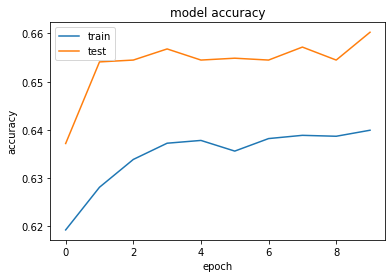

In [84]:
plt.plot(model1_output.history['acc'])
plt.plot(model1_output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.ylim((0.5, 1))
plt.show()

In [85]:
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))


Loss, accuracy on test data: 
0.6357 66.03%


In [86]:
y_pred = model1.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

In [87]:
confusion_matrix(y_test,y_pred1)

array([[1664,   14],
       [ 869,   52]])

## Model 2 :

### Attributes:

1. Layers - 6
2. Activation function for Input and Hidden Layer : Relu
3. Activation function for Output Layer : sigmoid
4. Batch_size = 20 
5. loss function : binary_crossentropy
6. optimizer='Adagrad'
7. metrics='accuracy'

### Explanation of CODE

This sequential model of Karas is built with activation function 'relu' for input layer and hidden layers and output layer with 'sigmoid' function. Initial model is built only with 6 layers in total, with neurons [13,14,15,16,20,1] respectively,and compiled with 'binary_crossentropy' loss and 'Adagrad' optimizer. Then model is fitted on training data which is splitted to 80% of total data, keeping batch size to 20 and epochs 10. The model is validated against the test data which is 20%. Calculated accuracy of training and testing(validation) data and confusion matrix is calculated.

#### Different parameters used:

##### Activation Functions:

1. tanh : It's a zero centered function which makes it easier to model inputs that have strongly negative, neutral, and strongly positive values.


2. Sigmoid : It's a smooth gradient function which prevents jumps in output values. Output values bound between 0 and 1, normalizing the output of each neuron.

###### Loss 

1. binary_crossentropy: It's a Binary Classification Loss Function,intended for use with binary classification where the target values are in the set {0, 1}.

##### Optimizer

1. Adagrad: It's a gradient-based optimizer which adapts the learning rate to the parameters, performing smaller updates (i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data and Adagrad has greatly improved the robustness of SGD.

### Training

In [88]:
model2 = Sequential()
model2.add(Dense(13, input_dim=13, activation='relu'))
model2.add(Dense(14, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [89]:
model2.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [90]:
model2_output = model2.fit(X_train, y_train, epochs=10, batch_size = 20, validation_data=(X_test,y_test))

Train on 10395 samples, validate on 2599 samples
Epoch 1/10
10395/10395 [==============================] - 4s 372us/step - loss: 0.6325 - acc: 0.6443 - val_loss: 0.5568 - val_acc: 0.6653
Epoch 2/10
10395/10395 [==============================] - 2s 203us/step - loss: 0.5176 - acc: 0.7246 - val_loss: 0.4361 - val_acc: 0.8188
Epoch 3/10
10395/10395 [==============================] - 2s 199us/step - loss: 0.4099 - acc: 0.8150 - val_loss: 0.3414 - val_acc: 0.8530
Epoch 4/10
10395/10395 [==============================] - 2s 194us/step - loss: 0.3213 - acc: 0.8674 - val_loss: 0.2892 - val_acc: 0.8649
Epoch 5/10
10395/10395 [==============================] - 2s 197us/step - loss: 0.2640 - acc: 0.9000 - val_loss: 0.2264 - val_acc: 0.9250
Epoch 6/10
10395/10395 [==============================] - 2s 194us/step - loss: 0.2172 - acc: 0.9250 - val_loss: 0.1746 - val_acc: 0.9550
Epoch 7/10
10395/10395 [==============================] - 2s 187us/step - loss: 0.1772 - acc: 0.9454 - val_loss: 0.1425 - v

### Testing

In [91]:
eval_results = model2.evaluate(X_test, y_test) 

2599/2599 [==============================] - 0s 66us/step


### Result and Analysis

In [92]:
print('Training Accuracy :', np.mean(model2_output.history["acc"]))
print('Validation Accuracy :', np.mean(model2_output.history["val_acc"]))

Training Accuracy : 0.8740163506424846
Validation Accuracy : 0.8922662522229565


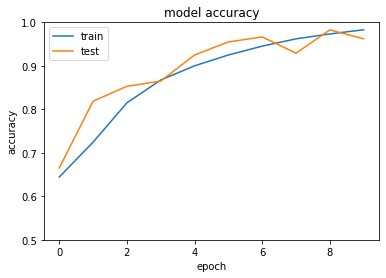

In [93]:
plt.plot(model2_output.history['acc'])
plt.plot(model2_output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim((0.5, 1))
plt.show()

In [94]:
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))


Loss, accuracy on test data: 
0.1205 96.23%


In [95]:
y_pred = model2.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
y_pred2 = np.array(rounded,dtype='int64')

In [96]:
confusion_matrix(y_test,y_pred2)

array([[1673,    5],
       [  93,  828]])

## Model 3 :

### Attributes:

1. Layers - 5
2. Activation function for Input and Hidden Layer : Relu
3. Activation function for Output Layer : sigmoid
4. Batch_size = 20
5. loss function : binary_crossentropy
6. optimizer='adam'
7. metrics='accuracy'

### Explanation of CODE

This sequential model of Karas is built with activation function 'relu' for input layer and hidden layers and output layer with 'sigmoid' function. Initial model is built only with 5 layers in total, with neurons [13,14,15,16,1] respectively,and compiled with 'binary_crossentropy' loss and 'Adam' optimizer. Then model is fitted on training data which is splitted to 80% of total data, keeping batch size to 20 and epochs 10. The model is validated against the test data which is 20%. Calculated accuracy of training and testing(validation) data and confusion matrix is calculated.

#### Different parameters used:

##### Activation Functions:

1. tanh : It's a zero centered function which makes it easier to model inputs that have strongly negative, neutral, and strongly positive values.

2. Sigmoid : It's a smooth gradient function which prevents jumps in output values. Output values bound between 0 and 1, normalizing the output of each neuron.

###### Loss 

1. binary_crossentropy: It's a Binary Classification Loss Function,intended for use with binary classification where the target values are in the set {0, 1}.

##### Optimizer

1. Adam: It's Adaptive Moment Estimation optimizer. Other optimizers maintain a single learning rate through out the training process, where as Adam adopts the learning rate as the training progresses (adaptive learning rates). It computes adaptive learning rates for each parameter, unlike Adagrad.

In [97]:
model3 = Sequential()
model3.add(Dense(13, input_dim=13, activation='relu'))
model3.add(Dense(14, activation='relu'))
model3.add(Dense(15, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [98]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
model3_output = model3.fit(X_train, y_train, epochs=10,batch_size=20, validation_data=(X_test,y_test))

Train on 10395 samples, validate on 2599 samples
Epoch 1/10
10395/10395 [==============================] - 5s 444us/step - loss: 0.6595 - acc: 0.6268 - val_loss: 0.6154 - val_acc: 0.6576
Epoch 2/10
10395/10395 [==============================] - 2s 215us/step - loss: 0.5929 - acc: 0.6673 - val_loss: 0.5300 - val_acc: 0.6768
Epoch 3/10
10395/10395 [==============================] - 2s 209us/step - loss: 0.4674 - acc: 0.7684 - val_loss: 0.3171 - val_acc: 0.8884
Epoch 4/10
10395/10395 [==============================] - 2s 201us/step - loss: 0.2488 - acc: 0.9145 - val_loss: 0.1714 - val_acc: 0.9588
Epoch 5/10
10395/10395 [==============================] - 2s 205us/step - loss: 0.1172 - acc: 0.9753 - val_loss: 0.0778 - val_acc: 0.9885
Epoch 6/10
10395/10395 [==============================] - 3s 245us/step - loss: 0.0613 - acc: 0.9878 - val_loss: 0.1701 - val_acc: 0.9219
Epoch 7/10
10395/10395 [==============================] - 3s 256us/step - loss: 0.0343 - acc: 0.9939 - val_loss: 0.0214 - v

### Testing

In [100]:
eval_results = model3.evaluate(X_test, y_test) 

2599/2599 [==============================] - 0s 64us/step


### Result and Analysis

In [101]:
print('Training Accuracy :', np.mean(model3_output.history["acc"]))
print('Validation Accuracy :', np.mean(model3_output.history["val_acc"]))

Training Accuracy : 0.8913035098694448
Validation Accuracy : 0.9087726024285147


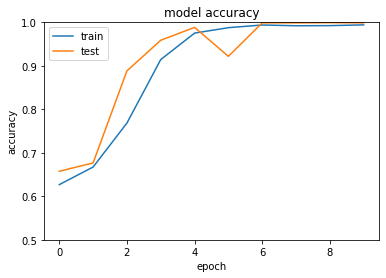

In [102]:
plt.plot(model3_output.history['acc'])
plt.plot(model3_output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim((0.5, 1))
plt.show()

In [103]:
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))


Loss, accuracy on test data: 
0.0064 99.88%


In [104]:
y_pred = model3.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
y_pred3 = np.array(rounded,dtype='int64')

In [105]:
confusion_matrix(y_test,y_pred3)

array([[1678,    0],
       [   3,  918]])

## Results - Summary of Choice of networks and Performance Change

### Model 1

Strated with most basic neural network structure with activation function 'tanh' for input layer and hidden layers and 'sigmoid' function for output layer. As this classification dataset is binary labeled, compiled the model with the loss function 'binary_crossentropy' and most basic optimizer is chosen i.e SGD optimizer.Intentionally, its learning rate is kept low i.e 0.001 to avoid long jumps/overshooting while training. This model then evaluated on test data , however, accuracy of the prediction is moderate which was not very satisfying which is 67.22% on testing data.

Training Accuracy : 0.6347474747388737

Validation Accuracy : 0.6538283955826124

Testing Accuracy: 0.6603

Confusion Matrix:

([[1664,   14],

 [ 869,   52]])
 
 
### Model 2

To overcome the drawbacks of first model, I changed 'tanh' function to more sophisticated activation function i.e 'relu' for input and hidden layers while keeping 'sigmoid' function as it is for output layer. As 'binary_crossentropy' seemd the right choice for binary labeled data, i kept it as it is. SGD optimizer performed poorly on training data, so some optimier with adapative learning rate was needed, so stated with 'Adagrad' instead other adaptive optimization algorithms and incremented one hidden layer with reducing batch size to 20. These changes improved results significantly and gave better accracy compared to Model 1.

Training Accuracy : 0.8740163506424846

Validation Accuracy : 0.8922662522229565

Testing Accuracy: 0.9623

Confusion Matrix:

([[1663,   55],

 [ 93,   828]]
 
 
### Model 3

Looking at the results of Model 3, only optimization algorithm ie Adagrad is replaced with Adam, so it could compute learning rate for each parameter, keeping all other parameters same. As expeted, this model gave even excellent accuracy than model 2.

Training Accuracy : 0.8913035098694448

Validation Accuracy : 0.9087726024285147

Testing Accuracy: 0.9988

Confusion Matrix:

([[1678,   0],

 [ 3,   918]]

## Conclusion


This assignment taught me implementing neural network with Keras library and importance of choosing right hyper-tuning parameters to fit the model and get better accuracy.

I have learnt all activation functions, optimizers, loss functions in depth and understood its tuning depending on the result i was getting from initial model. It's very important to choose right parameters initially to build the model and even if it does not work as per expectations, making right changes looking at its results, like i was able to do in this assignment.Adaptive learning rate algorithms gave better accuracy than static learning rate algorithm i.e SGD in this case.

Deep learning removes the burden of feature engineering from your shoulder,provided you choose right parameters to train your data.Also, deep learning brain can perform thousands of repetitive, routine tasks within a shorter period of time than it would take a human being. The quality of its work never diminishes, unless the training data includes raw data that does not represent the problem you are trying to solve.

## References

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez , "Wine Quality Data Set", https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Deep Learning Class Note

https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Deep%20Learning.ipynb

Deep Learning Assignment Class note

https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/Assign5.ipynb

How to Choose Loss Functions When Training Deep Learning Neural Networks

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

Keras: The Python Deep Learning library

https://keras.io